**DEEP FACE PRETRAINED MODEL**

In [ ]:
! pip install deepface

In [ ]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
input_image = cv2.imread('/content/cr7.png')

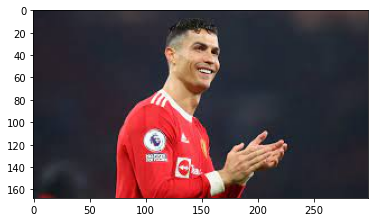

In [ ]:
plt.imshow(input_image[:,:,::-1])

In [ ]:
prediction  = DeepFace.analyze(input_image,actions=['gender'])

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 71.9MB/s]
Action: emotion: 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]


In [ ]:
prediction['gender']

'Man'

**MY MODEL**

In [ ]:
# my requirments file
# cvlib
# cv2
# tensorflow
# numpy

In [ ]:
#library to install in colab all others are already preinstalled in colab
!pip install cvlib

**IMPORTING LIBRARIES**

In [ ]:
#importing libraries
import cvlib as cv
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import tensorflow as tf

In [ ]:
#loading my trained model
my_model = tf.keras.models.load_model('/content/drive/MyDrive/gender_detection.model')

In [ ]:
#preprocessing function
# the image after mask removal from gan needs to be sent to my preprocessing function
def image_preprocessing(image):
  input_image = image
  face, confidence = cv.detect_face(input_image)
  start_X, start_Y, end_X, end_Y = face[0]
  resize_image = cv2.resize(input_image[start_Y:end_Y,start_X:end_X],(96,96))
  resize_image = resize_image.astype("float")/ 255.0
  img_array = img_to_array(resize_image)
  final_image = np.expand_dims(img_array, axis=0)
  return final_image

# only the preprocessing is done we can perform prediciton.
def predict(preprocessed_image):
  #gender labels
  labels = ["Man","Woman"]
  prediction = my_model.predict(preprocessed_image)[0]
  Predicted_label = labels[np.argmax(prediction)]
  return Predicted_label

In [ ]:
input_image = cv2.imread('/content/cr7.png')

In [ ]:
#call preprecessing funciton
preprocessed_image = image_preprocessing(input_image)

In [ ]:
#call model prediction with the preprocessed image
prediction = predict(preprocessed_image)

In [ ]:
print(prediction)

Man


**CONVERT TO TFLITE**

In [ ]:
! tflite_convert \
  --saved_model_dir=/content/drive/MyDrive/gender_detection.model \
  --output_file=/content/drive/MyDrive/gender_detection.tflite

2022-05-21 00:38:40.807637: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-21 00:38:42.407130: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-05-21 00:38:42.407211: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
W0521 00:38:43.419609 139832407922560 lite.py:770] Buffer deduplication procedure will be skipped when flatbuffer library is not properly loaded
